In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create a data frame with the data
d = {'q': ["US Economy in the short term", "America's Standing in the world", "Your personal Finances", "US Economy in the long run"],
      'hurt':[.72, .60, .59, .53],
      'neither': [.16, .13, .25, .12],
      'help': [.12, .26, .15, .34]}

df = pd.DataFrame(data = d)

df

,q,hurt,neither,help
0,US Economy in the short term,0.72,0.16,0.12
1,America's Standing in the world,0.60,0.13,0.26
2,Your personal Finances,0.59,0.25,0.15
3,US Economy in the long run,0.53,0.12,0.34


In [309]:
df.to_csv("../cnn_data.csv")

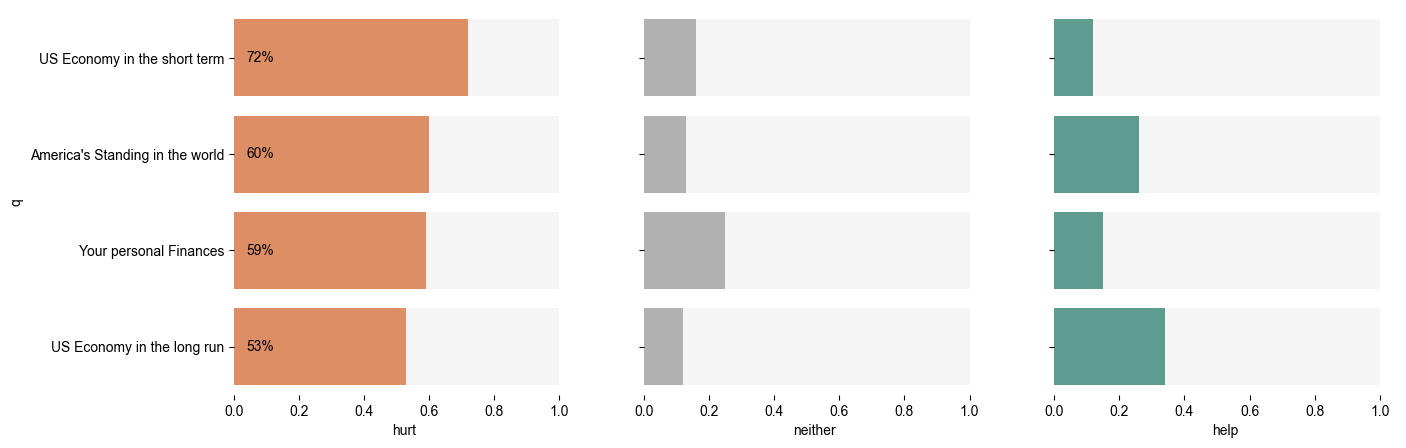

In [321]:
axes_settings = {
    "spines.top": False,
    "spines.right": False,
    "spines.bottom": False,
    "spines.left":False,
    #"facecolor": (0, 0, 0, .1),
    #"facealpha":.4,
    #"grid": True, 
    #"grid.axis": 'y'   
}

plt.rc("axes", **axes_settings)

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(data=df, x=[1]*len(df), y='q', estimator=sum, ax=ax[0], color='#f5f5f5')
sns.barplot(data = df, y = "q", x = "hurt", ax = ax[0], color = "#f18851")

sns.barplot(data=df, x=[1]*len(df), y='q', estimator=sum, ax=ax[1], color='#f5f5f5')
sns.barplot(data = df, y = "q", x = "neither", ax = ax[1], color = "#b1b1b1")

sns.barplot(data=df, x=[1]*len(df), y='q', estimator=sum, ax=ax[2], color='#f5f5f5')
sns.barplot(data = df, y = "q", x = "help", ax = ax[2], color = "#52a795")

# 4. Add text annotations to bars (for example, to the first plot)
for i, v in enumerate(df['hurt']):
    ax[0].text(0.125, i, f'{100*v:.0f}%', va='center', ha = "right")
    

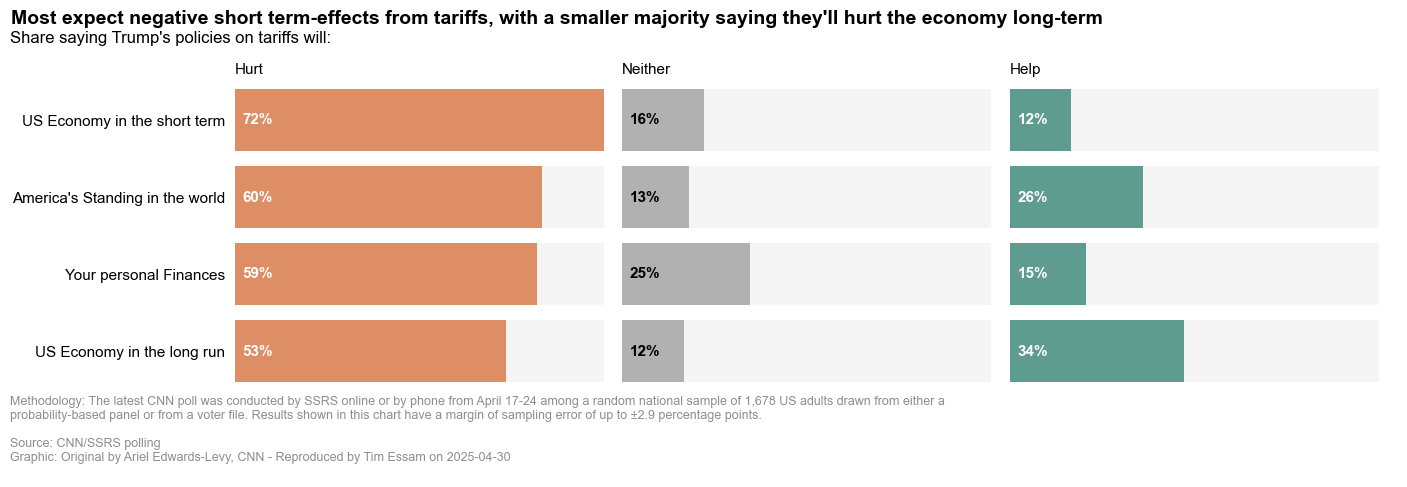

In [ ]:
cnn_caption = '''
Methodology: The latest CNN poll was conducted by SSRS online or by phone from April 17-24 among a random national sample of 1,678 US adults drawn from either a 
probability-based panel or from a voter file. Results shown in this chart have a margin of sampling error of up to ±2.9 percentage points.

Source: CNN/SSRS polling
Graphic: Original by Ariel Edwards-Levy, CNN - Reproduced by Tim Essam on 2025-04-30
'''


plt.rcParams['font.family'] = 'sans-serif'  # Set the default font family
plt.rcParams['font.sans-serif'] = ['Arial'] + plt.rcParams['font.sans-serif']

colors = ["#f18851", "#b1b1b1", "#52a795"]
font_colors = ["white", "black", "white"]

fig, ax = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
plt.subplots_adjust(wspace=0) 

for i, col in enumerate(df.columns[1:]):
    # Background bar (total)
    sns.barplot(data=df, x=[.72]*len(df), y='q', estimator=sum, ax=ax[i], color='#f5f5f5')
    # Foreground bar (group)
    sns.barplot(data=df, y='q', x=col, ax=ax[i], color=colors[i])

    # Add text annotations
    for j, val in enumerate(df[col]):
        ax[i].text(0.075, j, f'{val * 100:.0f}%', va='center', ha = "right", size = 11, color = font_colors[i], weight = "bold")
        
        ax[i].set_title(col.capitalize(), loc = "left", size = 11)
        ax[i].set_ylabel(None)
        ax[i].set_xlabel(None)
        ax[i].set_xticks([])
        ax[i].tick_params(axis='y', left=False, labelsize = 11)
       
fig.suptitle("Most expect negative short term-effects from tariffs, with a smaller majority saying they'll hurt the economy long-term", 
             x = 0.34,
             y = 1.06,
             size = 14,
             weight = "bold")

plt.text(s = "Share saying Trump's policies on tariffs will:", y = -1, x = -1.95, size = 12)

plt.text(s = cnn_caption, y = 4.6, x = -1.95, size = 9, color = "#8e8e8e")

plt.savefig("../CNN_tarrif_remake.png", bbox_inches = "tight")


In [161]:
df_long = df.melt(id_vars='q', value_vars=['hurt', 'neither', 'help'],
                  var_name='category', value_name='value')


In [293]:
import os
os.getcwd()

'/Users/tim/Documents/Github/python_viz/notebooks'